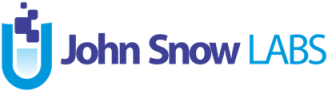

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/benchmarks/Benchmarking_with_Harness.ipynb)

**LangTest**is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy**
models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

This notebook provides a comprehensive overview of benchmarking Language Models (LLMs) in Question-Answering tasks. Explore step-by-step instructions on conducting robustness and accuracy tests to evaluate LLM performance.

# Getting started with LangTest

### Configuration

In [19]:
yaml_content = """
model_parameters:
  max_tokens: 64
  device: 0
  task: text2text-generation
tests:
  defaults:
    min_pass_rate: 0.65
  robustness:
    add_typo:
      min_pass_rate: 0.7
"""

The content stored in the variable `yaml_content` (which should be formatted in valid YAML syntax) is written to the opened file using the `f.write` method.

In [20]:
import yaml

# write a yaml file
with open('config.yml', 'w') as f:
    f.write(yaml_content)

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [21]:
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - |
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>.

In [22]:
harness = Harness(
    task="question-answering",
    model={
        "model": "google/flan-t5-base",
        "hub": "huggingface"
    },
    data=[
        {
            "data_source": "MedMCQA"
        },
        {
            "data_source": "PubMedQA"
        },
        {
            "data_source": "MMLU"
        },
        {
            "data_source": "MedQA"
        }
    ],
    config="config.yml",
    benchmarking={
        "save_dir":"~/.langtest/leaderboard/"
    }
)

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to C:\Users\KALYAN\.cache\huggingface\token
Login successful
Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64,
  "device": 0,
  "task": "text2text-generation"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [23]:
harness.generate()

                                    MedMCQA                                     


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 138 samples removed out of 4183



--------------------------------------------------------------------------------

                                    PubMedQA                                    


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


--------------------------------------------------------------------------------

                                      MMLU                                      


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 949.58it/s]
[W010] - Test 'add_typo': 35 samples removed out of 1089



--------------------------------------------------------------------------------

                                     MedQA                                      


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 44 samples removed out of 1323



--------------------------------------------------------------------------------



In [24]:
harness.testcases()

,category,dataset_name,test_type,original_context,original_question,perturbed_context,perturbed_question,options
0,robustness,MedMCQA,add_typo,-,A patient who was on ventilator and being vent...,-,A patient who was on ventilator anr being vent...,"A. Assess the patient, give bag and mask venti..."
1,robustness,MedMCQA,add_typo,-,Highest concentration of oxygen is delivered t...,-,Highest concewtration of oxygen is delivered t...,A. Nasal cannula\nB. Venturi mask\nC. Bag and ...
2,robustness,MedMCQA,add_typo,-,Steps of intubation - arrange in sequence:- a....,-,Steps of intubation - arrange in sequence:- a....,A. ABCDE\nB. DBCEA\nC. ACBED\nD. CBAED
3,robustness,MedMCQA,add_typo,-,Tracheal secretions should be suctioned for:,-,Tracheal secrrtions should be suctioned for:,A. 10-15 seconds\nB. 60 seconds\nC. 30 seconds...
4,robustness,MedMCQA,add_typo,-,Which of the following nerve fibre types is le...,-,Which of the following zerve fibre types is le...,A. A beta\nB. A alpha\nC. B fibers\nD. C fibers
...,...,...,...,...,...,...,...,...
7373,robustness,MedQA,add_typo,-,A 39-year-old woman presents to the clinic for...,-,A 39-year-old woman presents to the clinic for...,A. Erythropoietin\nB. Glucose\nC. Triiodothyro...
7374,robustness,MedQA,add_typo,-,A 38-year-old woman comes to the physician bec...,-,A 38-year-old woman comes to the physician bec...,A. Celiac disease\nB. Carcinoid tumor\nC. VIPo...
7375,robustness,MedQA,add_typo,-,A 21-year-old college student comes to the phy...,-,A 21-year-old college student comes to the phy...,A. Trial of diphenhydramine\nB. Complete caffe...
7376,robustness,MedQA,add_typo,-,A 19-year-old man is brought to the physician ...,-,A 19-year-old man is brought to the physician ...,A. Social anxiety disorder\nB. Avoidant person...


In [25]:
harness.run()

                                    MedMCQA                                     


Running testcases... : 100%|██████████| 4045/4045 [03:53<00:00, 17.33it/s]


--------------------------------------------------------------------------------

                                    PubMedQA                                    


Running testcases... : 100%|██████████| 1000/1000 [01:02<00:00, 15.91it/s]


--------------------------------------------------------------------------------

                                      MMLU                                      


Running testcases... : 100%|██████████| 1054/1054 [00:59<00:00, 17.83it/s]


--------------------------------------------------------------------------------

                                     MedQA                                      


Running testcases... : 100%|██████████| 1279/1279 [01:11<00:00, 17.89it/s]


--------------------------------------------------------------------------------



In [26]:
harness.generated_results()

,category,dataset_name,test_type,original_context,original_question,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
0,robustness,MedMCQA,add_typo,-,A patient who was on ventilator and being vent...,-,A patient who was on ventilator anr being vent...,"A. Assess the patient, give bag and mask venti...",A,A,True
1,robustness,MedMCQA,add_typo,-,Highest concentration of oxygen is delivered t...,-,Highest concewtration of oxygen is delivered t...,A. Nasal cannula\nB. Venturi mask\nC. Bag and ...,A,A,True
2,robustness,MedMCQA,add_typo,-,Steps of intubation - arrange in sequence:- a....,-,Steps of intubation - arrange in sequence:- a....,A. ABCDE\nB. DBCEA\nC. ACBED\nD. CBAED,A,B,True
3,robustness,MedMCQA,add_typo,-,Tracheal secretions should be suctioned for:,-,Tracheal secrrtions should be suctioned for:,A. 10-15 seconds\nB. 60 seconds\nC. 30 seconds...,B,B,True
4,robustness,MedMCQA,add_typo,-,Which of the following nerve fibre types is le...,-,Which of the following zerve fibre types is le...,A. A beta\nB. A alpha\nC. B fibers\nD. C fibers,D,D,True
...,...,...,...,...,...,...,...,...,...,...,...
7373,robustness,MedQA,add_typo,-,A 39-year-old woman presents to the clinic for...,-,A 39-year-old woman presents to the clinic for...,A. Erythropoietin\nB. Glucose\nC. Triiodothyro...,D,D,True
7374,robustness,MedQA,add_typo,-,A 38-year-old woman comes to the physician bec...,-,A 38-year-old woman comes to the physician bec...,A. Celiac disease\nB. Carcinoid tumor\nC. VIPo...,D,D,True
7375,robustness,MedQA,add_typo,-,A 21-year-old college student comes to the phy...,-,A 21-year-old college student comes to the phy...,A. Trial of diphenhydramine\nB. Complete caffe...,B,B,True
7376,robustness,MedQA,add_typo,-,A 19-year-old man is brought to the physician ...,-,A 19-year-old man is brought to the physician ...,A. Social anxiety disorder\nB. Avoidant person...,D,D,True


In [27]:
harness.report()

Benchmarking Results: google/flan-t5-base  \
                                                                 fail_count   
dataset_name category   test_type                                             
MedMCQA      robustness add_typo                                        173   
PubMedQA     robustness add_typo                                          3   
MMLU         robustness add_typo                                         15   
MedQA        robustness add_typo                                          2   

                                                                                
                                  pass_count pass_rate minimum_pass_rate  pass  
dataset_name category   test_type                                               
MedMCQA      robustness add_typo        3872       96%               70%  True  
PubMedQA     robustness add_typo         997      100%               70%  True  
MMLU         robustness add_typo        1039       99%               70%  True  
MedQA        robustness add_typo        1277      100%               70%  True

In [28]:
harness.get_leaderboard()

,model,Avg,MMLU,MedMCQA,MedQA,PubMedQA
0,google/flan-t5-base,0.984609,0.985769,0.957231,0.998436,0.997


### Benchmarking `google/flan-t5-large` model

In [29]:
harness1 = Harness(
    task="question-answering",
    model={
        "model": "google/flan-t5-large",
        "hub": "huggingface"
    },
    data=[
        {
            "data_source": "MedMCQA"
        },
        {
            "data_source": "PubMedQA"
        },
        {
            "data_source": "MMLU"
        },
        {
            "data_source": "MedQA"
        }
    ],
    config="config.yml",
    benchmarking={
        "save_dir":"~/.langtest/leaderboard/"
    }
)

Token has not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to C:\Users\KALYAN\.cache\huggingface\token
Login successful
Test Configuration : 
 {
 "model_parameters": {
  "max_tokens": 64,
  "device": 0,
  "task": "text2text-generation"
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 0.65
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [30]:
harness1.generate()

                                    MedMCQA                                     


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 140 samples removed out of 4183



--------------------------------------------------------------------------------

                                    PubMedQA                                    


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 1 samples removed out of 1000



--------------------------------------------------------------------------------

                                      MMLU                                      


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 28 samples removed out of 1089



--------------------------------------------------------------------------------

                                     MedQA                                      


Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
[W010] - Test 'add_typo': 60 samples removed out of 1323



--------------------------------------------------------------------------------



In [31]:
harness1.testcases()

,category,dataset_name,test_type,original_context,original_question,perturbed_context,perturbed_question,options
0,robustness,MedMCQA,add_typo,-,A patient who was on ventilator and being vent...,-,A patient who was on ventilator and being vent...,"A. Assess the patient, give bag and mask venti..."
1,robustness,MedMCQA,add_typo,-,Highest concentration of oxygen is delivered t...,-,Hkghest concentration of oxygen is delivered t...,A. Nasal cannula\nB. Venturi mask\nC. Bag and ...
2,robustness,MedMCQA,add_typo,-,Steps of intubation - arrange in sequence:- a....,-,Steps of intubation - arrange in sequence:- a....,A. ABCDE\nB. DBCEA\nC. ACBED\nD. CBAED
3,robustness,MedMCQA,add_typo,-,Tracheal secretions should be suctioned for:,-,Tracheal secretions should be suctioned ror:,A. 10-15 seconds\nB. 60 seconds\nC. 30 seconds...
4,robustness,MedMCQA,add_typo,-,Which of the following nerve fibre types is le...,-,Ehich of the following nerve fibre types is le...,A. A beta\nB. A alpha\nC. B fibers\nD. C fibers
...,...,...,...,...,...,...,...,...
7361,robustness,MedQA,add_typo,-,A 39-year-old woman presents to the clinic for...,-,A 39-year-old woman presents to the clinic for...,A. Erythropoietin\nB. Glucose\nC. Triiodothyro...
7362,robustness,MedQA,add_typo,-,A 38-year-old woman comes to the physician bec...,-,A 38-year-old woman comes to the physician bec...,A. Celiac disease\nB. Carcinoid tumor\nC. VIPo...
7363,robustness,MedQA,add_typo,-,A 21-year-old college student comes to the phy...,-,A 21-year-old college student comes to the phy...,A. Trial of diphenhydramine\nB. Complete caffe...
7364,robustness,MedQA,add_typo,-,A 19-year-old man is brought to the physician ...,-,A 19-year-old man is brought to the physician ...,A. Social anxiety disorder\nB. Avoidant person...


In [32]:
harness1.run()

                                    MedMCQA                                     


Running testcases... : 100%|██████████| 4043/4043 [07:10<00:00,  9.39it/s]


--------------------------------------------------------------------------------

                                    PubMedQA                                    


Running testcases... : 100%|██████████| 999/999 [03:02<00:00,  5.47it/s]


--------------------------------------------------------------------------------

                                      MMLU                                      


Running testcases... : 100%|██████████| 1061/1061 [01:55<00:00,  9.17it/s]


--------------------------------------------------------------------------------

                                     MedQA                                      


Running testcases... : 100%|██████████| 1263/1263 [02:19<00:00,  9.07it/s]

--------------------------------------------------------------------------------



In [33]:
harness1.generated_results()

,category,dataset_name,test_type,original_context,original_question,perturbed_context,perturbed_question,options,expected_result,actual_result,pass
0,robustness,MedMCQA,add_typo,-,A patient who was on ventilator and being vent...,-,A patient who was on ventilator and being vent...,"A. Assess the patient, give bag and mask venti...",A,A,True
1,robustness,MedMCQA,add_typo,-,Highest concentration of oxygen is delivered t...,-,Hkghest concentration of oxygen is delivered t...,A. Nasal cannula\nB. Venturi mask\nC. Bag and ...,B,A,False
2,robustness,MedMCQA,add_typo,-,Steps of intubation - arrange in sequence:- a....,-,Steps of intubation - arrange in sequence:- a....,A. ABCDE\nB. DBCEA\nC. ACBED\nD. CBAED,D,D,True
3,robustness,MedMCQA,add_typo,-,Tracheal secretions should be suctioned for:,-,Tracheal secretions should be suctioned ror:,A. 10-15 seconds\nB. 60 seconds\nC. 30 seconds...,A,A,True
4,robustness,MedMCQA,add_typo,-,Which of the following nerve fibre types is le...,-,Ehich of the following nerve fibre types is le...,A. A beta\nB. A alpha\nC. B fibers\nD. C fibers,D,D,True
...,...,...,...,...,...,...,...,...,...,...,...
7361,robustness,MedQA,add_typo,-,A 39-year-old woman presents to the clinic for...,-,A 39-year-old woman presents to the clinic for...,A. Erythropoietin\nB. Glucose\nC. Triiodothyro...,E,E,True
7362,robustness,MedQA,add_typo,-,A 38-year-old woman comes to the physician bec...,-,A 38-year-old woman comes to the physician bec...,A. Celiac disease\nB. Carcinoid tumor\nC. VIPo...,D,D,True
7363,robustness,MedQA,add_typo,-,A 21-year-old college student comes to the phy...,-,A 21-year-old college student comes to the phy...,A. Trial of diphenhydramine\nB. Complete caffe...,B,B,True
7364,robustness,MedQA,add_typo,-,A 19-year-old man is brought to the physician ...,-,A 19-year-old man is brought to the physician ...,A. Social anxiety disorder\nB. Avoidant person...,D,D,True


In [34]:
harness1.report()

Benchmarking Results: google/flan-t5-large  \
                                                                  fail_count   
dataset_name category   test_type                                              
MedMCQA      robustness add_typo                                         509   
PubMedQA     robustness add_typo                                          82   
MMLU         robustness add_typo                                         110   
MedQA        robustness add_typo                                          50   

                                                                                
                                  pass_count pass_rate minimum_pass_rate  pass  
dataset_name category   test_type                                               
MedMCQA      robustness add_typo        3534       87%               70%  True  
PubMedQA     robustness add_typo         917       92%               70%  True  
MMLU         robustness add_typo         951       90%               70%  True  
MedQA        robustness add_typo        1213       96%               70%  True

In [35]:
harness1.get_leaderboard()

,model,Avg,MMLU,MedMCQA,MedQA,PubMedQA
0,google/flan-t5-base,0.984609,0.985769,0.957231,0.998436,0.997000
1,google/flan-t5-large,0.912189,0.896324,0.874103,0.960412,0.917918
